# Laboratorio 2 - Agrupación

## Integrantes - Grupo 19
* Carol Sofía Florido Castro - 202111430
* Juan Martin Vasquez Cristancho - 202113314
* Natalia Villegas Calderon - 202113370


## Objetivos
* Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
* Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
* Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
* Construir una tabla comparativa que muestre el rendimiento de los tres modelos de agrupación.
* Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización.
* Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## Caso de Negocio: FinanzasAlpes

La agrupación es una técnica de aprendizaje no supervisado que permite identificar patrones y tendencias en los datos con base en la identificación de grupos o segmentos de objetos con características comunes. Por ejemplo, para el caso una empresa que ofrece servicios de tarjetas de crédito, la segmentación de clientes facilitaría la personalización de productos y servicios de acuerdo con las necesidades y comportamientos específicos de cada grupo identificado. Además, se podrían dirigir campañas de marketing a segmentos particulares, optimizando la comunicación y mejorando la experiencia de los clientes a través de un servicio de atención más ajustado a sus preferencias y hábitos.
En este marco, FinanzasAlpes, una empresa emisora de tarjetas de crédito, busca segmentar a sus clientes según su comportamiento de compra en centros comerciales, con el objetivo de identificar los distintos perfiles de tarjetahabientes y desarrollar estrategias de marketing personalizadas para cada segmento. Para llevar a cabo este estudio, la empresa nos ha contratado como científicos de datos y nos ha proporcionado un conjunto de datos sobre sus clientes, que incluye información detallada sobre saldos, límites de crédito, hábitos de compra y otros aspectos relevantes.



## Datos:
Se trabaja con un conjunto de datos que contiene 8950 registros de clientes bancarios con los siguientes atributos:

- **ID**: Identificador del cliente.
- **SALDO**: Saldo medio mensual (basado en los saldos medios diarios).
- **F_SALDO**: Relación de los últimos 12 meses con el saldo. (Entre 0 y 1, donde 1: Se actualiza con frecuencia, 0: No se actualiza con frecuencia).
- **COMPRAS**: Importe total de las compras realizadas en los últimos 12 meses.
- **COMPRAS_PUNTUALES**: Importe total de las compras puntuales.
- **COMPRAS_PLAZOS**: Importe total de las compras a plazos.
- **AVANCE_EFECTIVO**: Importe total de avance en efectivo.
- **F_COMPRAS**: Frecuencia de compras (Porcentaje de meses con al menos una compra). (Entre 0 y 1 donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PUNTUALES**: Frecuencia de las compras puntuales. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PLAZOS**: Frecuencia de compra a plazos. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_AVANCE_EFECTIVO**: Frecuencia de los avances en efectivo. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **P_AVANCE_EFECTIVO**: Importe medio por operación de avance en efectivo.
- **P_COMPRAS**: Importe medio por operación de compra.
- **LÍMITE_CREDITO**: Límite de crédito.
- **PAGOS**: Pagos totales (importe pagado por el cliente para reducir el saldo de su extracto en el periodo).
- **PAGOS_MINIMOS**: Total pagos mínimos en el periodo.
- **F_PAGOS_COMPLETOS**: Porcentaje de meses con pago completo del saldo vencido.
- **MESES_CLIENTE**: Número de meses como cliente.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler


# 0. Carga y manipulación básica de datos

In [3]:
df = pd.read_csv("202510_Laboratorio 2 - Agrupación_Customer_Data.csv", delimiter=";",encoding="latin1")
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


Se evidencia que el conjunto de datos tiene 8950 registros y 18 columnas.

In [4]:
df.shape

(8950, 18)

Se observan los tipos de datos cargados

In [5]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

Como se evidencia los tipos de datos coinciden con la información descrita en el diccionario de los mismos.

# 1. Entendimiento de los datos

Se cuenta con las siguientes variables

In [6]:
column_titles = df.columns.tolist()
column_titles

['ID',
 'SALDO',
 'F_SALDO',
 'COMPRAS',
 'COMPRAS_PUNTUALES',
 'COMPRAS_PLAZOS',
 'AVANCE_EFECTIVO',
 'F_COMPRAS',
 'F_COMPRAS_PUNTUALES',
 'F_COMPRAS_PLAZOS',
 'F_AVANCE_EFECTIVO',
 'P_AVANCE_EFECTIVO',
 'P_COMPRAS',
 'LÍMITE_CREDITO',
 'PAGOS',
 'PAGOS_MINIMOS',
 'F_PAGOS_COMPLETOS',
 'MESES_CLIENTE']

## 1.1 Atributos númericos y categóricos

### 1.1.1 Atributos numéricos

In [7]:
atributosNum = df.select_dtypes(include=[np.number]).columns
pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

,Atributos numéricos
0,SALDO
1,F_SALDO
2,COMPRAS
3,COMPRAS_PUNTUALES
4,COMPRAS_PLAZOS
5,AVANCE_EFECTIVO
6,F_COMPRAS
7,F_COMPRAS_PUNTUALES
8,F_COMPRAS_PLAZOS
9,F_AVANCE_EFECTIVO


A continuación, se presentan las descripciones de los atributos numéricos, detallando la media, la desviación estaándar, el mínimo, el máximo y los cuartiles. Estos valores luego se analizaran en la sección de Análisis de Consistencia y Análisis de Validez.

In [8]:
df[atributosNum].describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Se generan las graficas boxplot para evidenciar como se distribuyen los datos en cada una de las variables numéricas.

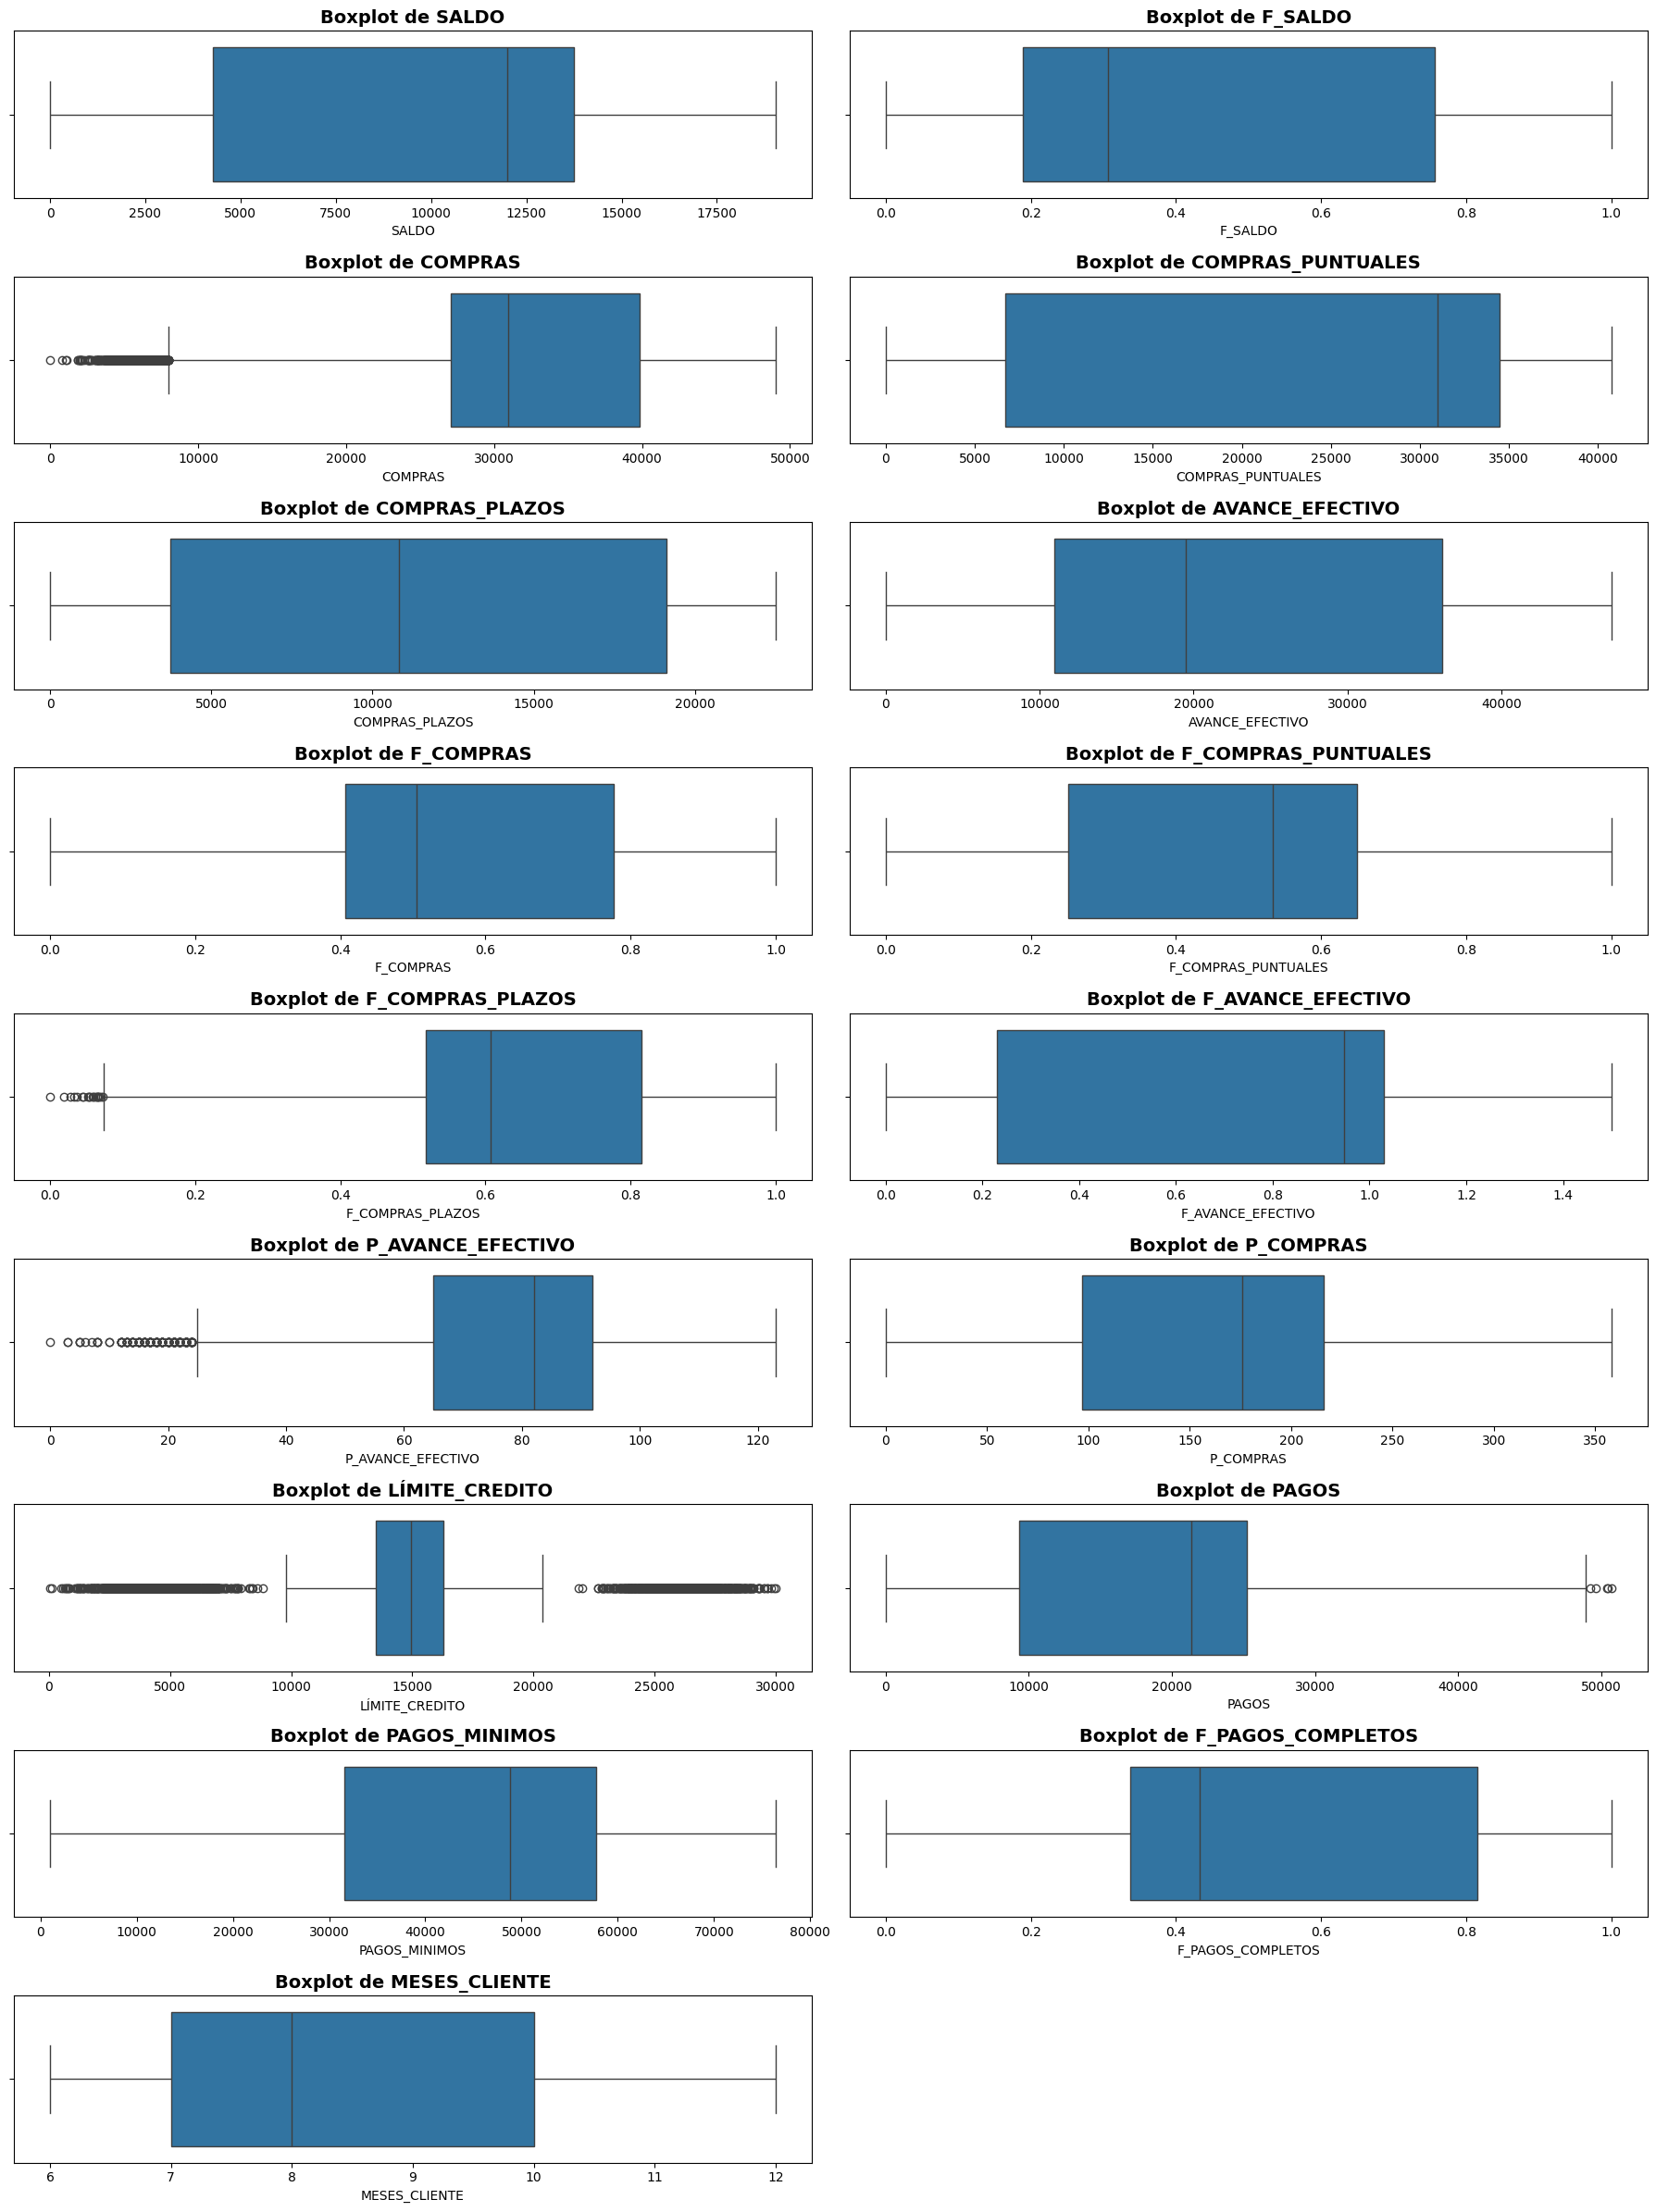

In [10]:
plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Segun los boxplots, se evidencia que algunas de las variables como: LIMITE_CREDITO, AVANCE_EFECTIVO y COMPRAS, presentan valores atípicos. Lo anterior puede representar que esas variables son muy dispersas o hay muchos registros con datos fuera de lo común. Por lo anterior, se fortalece la necesidad de usar un escalador (escalar los datos) debido a que varios algoritmos de agrupación (al basarse en distancias) son sensibles a la escala de los datos.

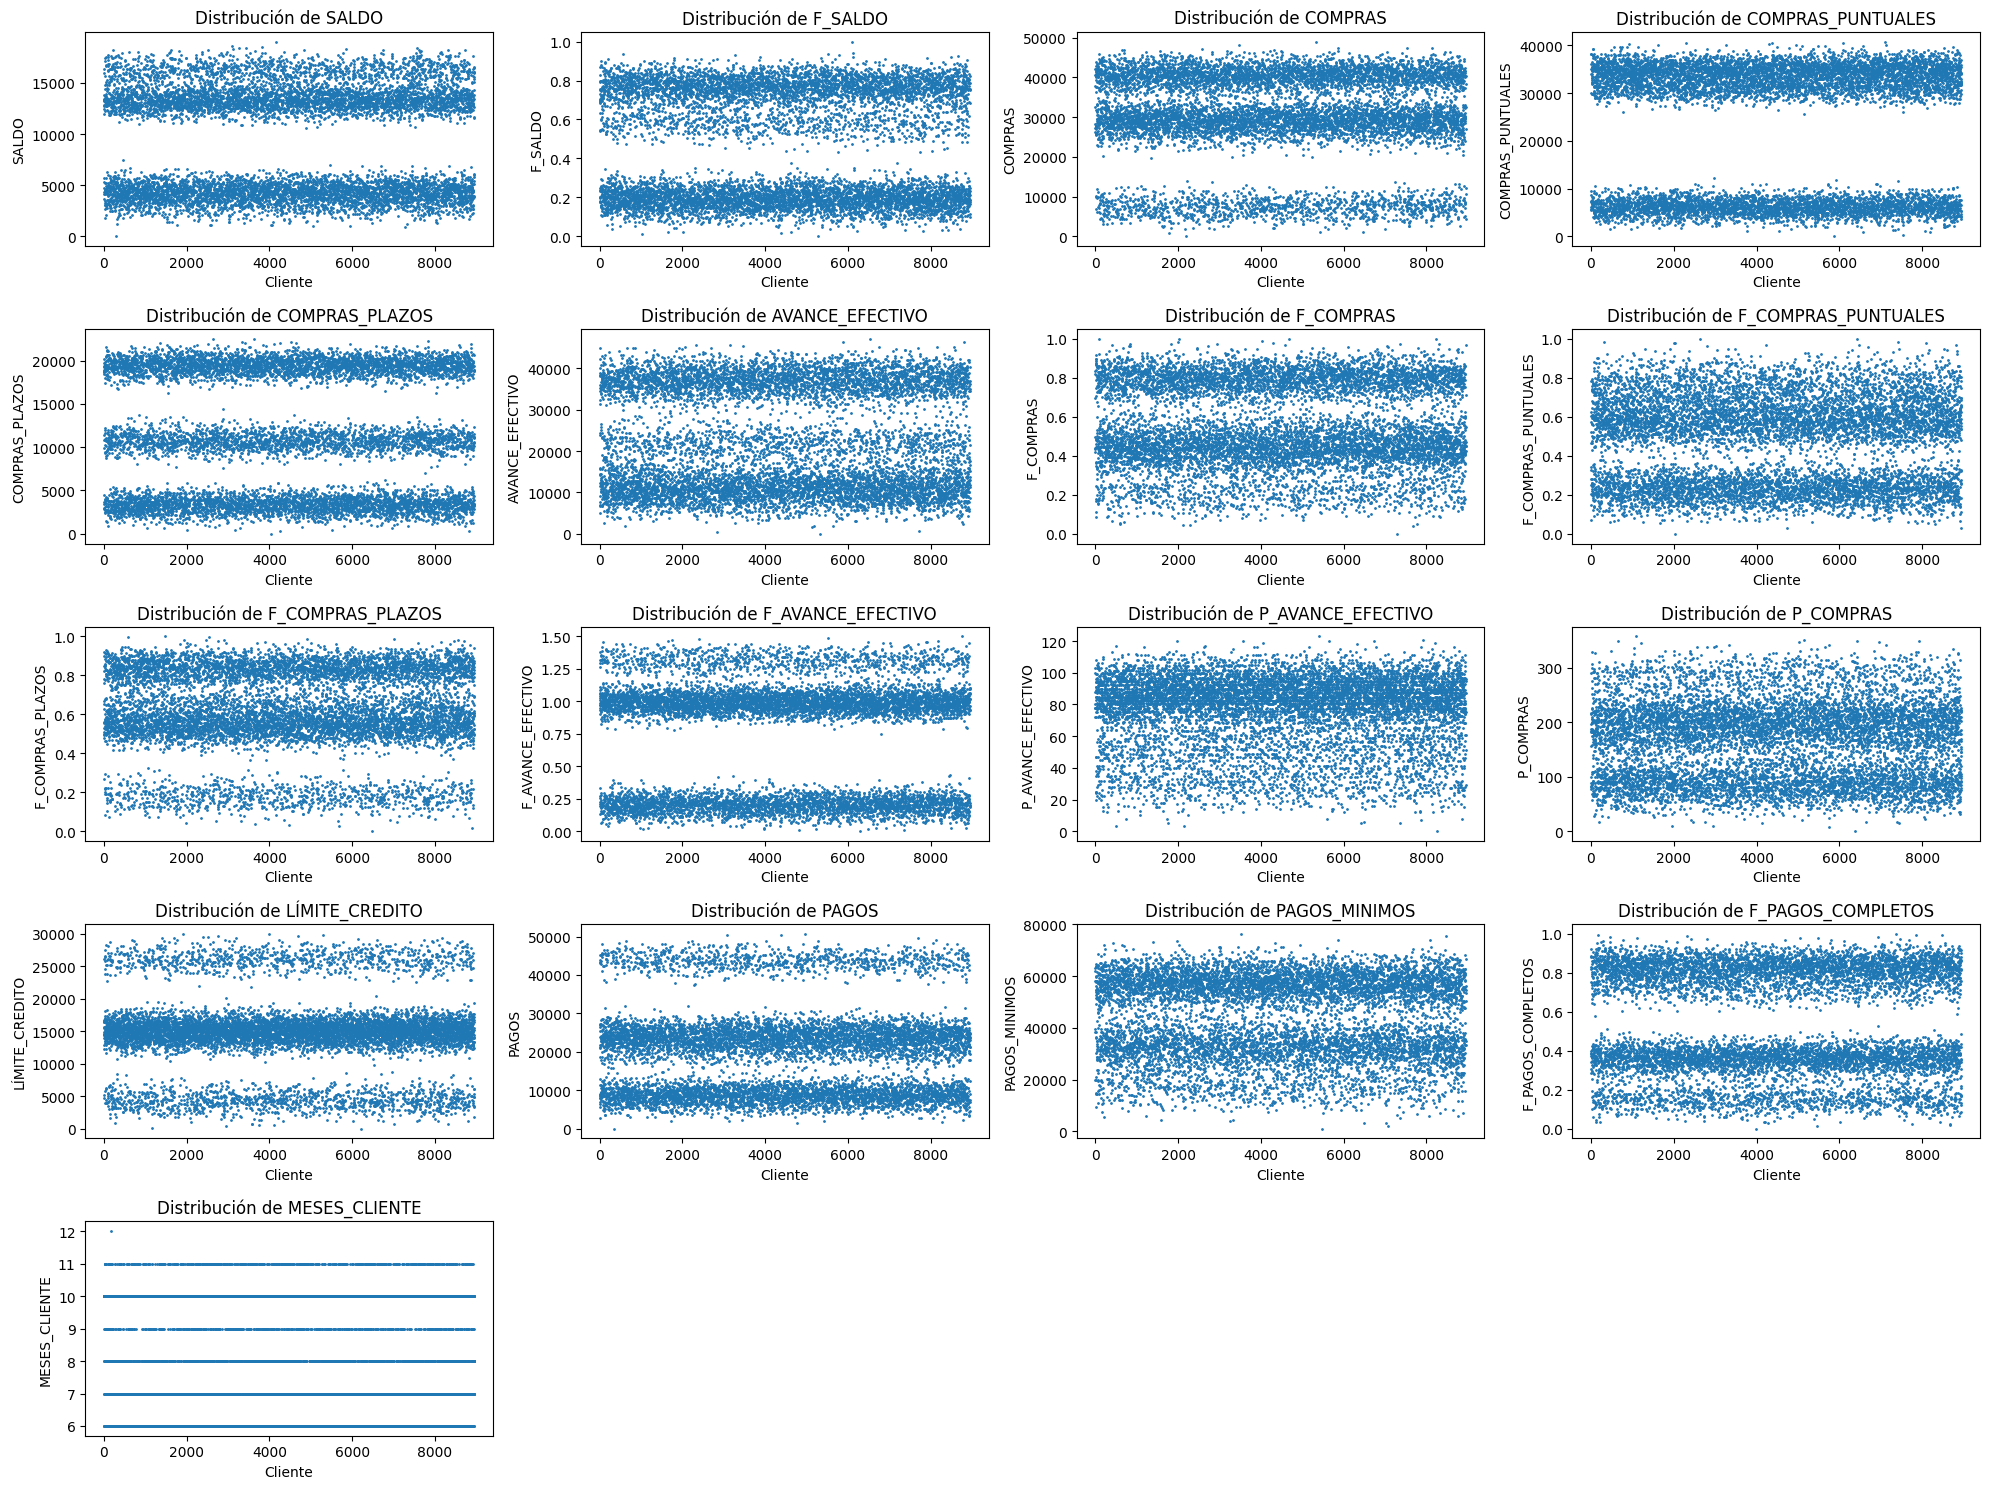

In [11]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada variable y crear un scatter plot
for i, var in enumerate(atributosNum):
    x = df.index  # Índices de los pacientes
    y = df[var]   # Variable actual

    axes[i].scatter(x, y, s=1)
    axes[i].set_xlabel('Cliente')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Distribución de {var}')

# Eliminar cualquier subplot vacío si hay menos variables que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se evidencia que las variables estan fuertemente agrupadas en ciertos rangos. Por ejemplo, la distribucion de meses de clientes tiene unicamente registros de 6, 7, 8, 9, 10 y 11 meses. Lo anterior puede ser un indicio que los clientes que llevan menos de 6 meses no estan en la base de datos o que la empresa no tiene clientes que lleven mas de 11 meses. Lo anterior se debe tener en cuenta para la interpretacion de los resultados. Otra evidencia son las compras puntuales, donde hay dos grandes grupos de registros compras menores a 10.000 y compras entre 30.000 y 40.000. Esto puede ser un indicio de que la empresa tiene dos tipos de clientes, los que compran poco y los que compran mucho.

<Axes: >

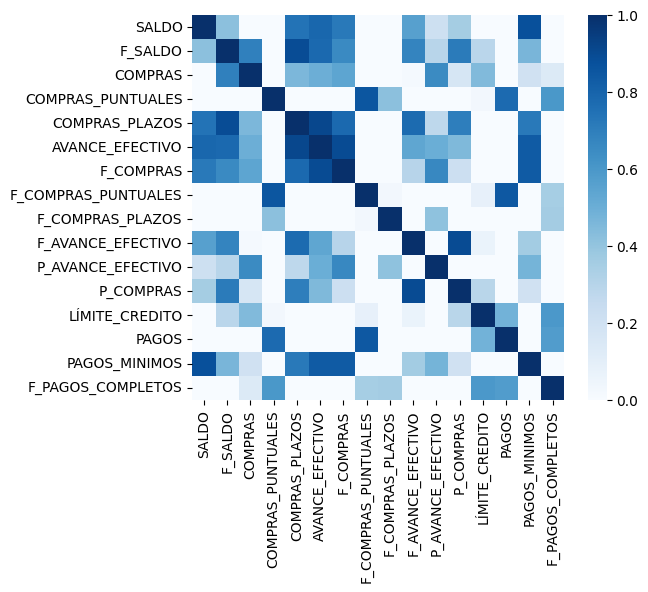

In [47]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[atributosNum].corr(), cmap="Blues", vmin=0, vmax=1)

### 1.1.2 Atributos categoricos

De acuerdo con el diccionario NO hay atributos categóricos, ya que todos los elementos indicados en el diccionario son numericos (algunos continuos otros enteros)

In [12]:
atributosCat = []

## 1.2 Análisis de calidad de datos

### 1.2.1 Análisis de completitud

In [46]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros duplicados": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros duplicados
0,PAGOS_MINIMOS,96.502793,3.497207,313.0
1,LÍMITE_CREDITO,99.988827,0.011173,1.0
2,ID,100.000000,0.000000,0.0
3,SALDO,100.000000,0.000000,0.0
4,F_PAGOS_COMPLETOS,100.000000,0.000000,0.0
5,PAGOS,100.000000,0.000000,0.0
6,P_COMPRAS,100.000000,0.000000,0.0
7,P_AVANCE_EFECTIVO,100.000000,0.000000,0.0
8,F_AVANCE_EFECTIVO,100.000000,0.000000,0.0
9,F_COMPRAS_PLAZOS,100.000000,0.000000,0.0


Se evidencia que existen valores nulos en los datos. En específico respecto a la variable "PAGOS_MINIMOS" (con 3.5% de valores nulos) y la variable "LÍMITE_CREDITO" (con 0.01% de valores nulos). Al tratarse de muy pocos valores, se tiene varias opciones para tratarlos, como eliminar los registros que tienen estos valores nulos, reemplazarlos por un valor específico dado por el negocio o insertar algun tipo de valor estadístico como la media o la mediana. 

Las demás variables no presentan valores nulos.

### 1.2.2 Análisis de Unicidad

A continuación, se presenta el análisis de unicidad de los datos, es decir, se busca identificar si existen registros duplicados en el conjunto de datos.

In [35]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 0 registros duplicados (0.00%)


Se observa que no existen registros duplicados en el conjunto de datos.

### 1.2.3 Análisis de Validez

In [13]:
categorical_expected = {
}

In [14]:
# Verificación de variables categóricas esperadas
for col, expected_values in categorical_expected.items():
    invalid_values = df[~df[col].isin(expected_values)][col].unique()
    if len(invalid_values) > 0:
        print(f"\nValores no esperados en {col}: {invalid_values}")
    else:
        print(f"\nTodos los valores en {col} son válidos")

In [15]:
# Variables con un mínimo específico (en general es que las variables sean positivas)
numeric_minimums = {
    "F_SALDO": 0,
    "F_COMPRAS": 0,
    "F_COMPRAS_PUNTUALES": 0,
    "F_COMPRAS_PLAZOS": 0,
    "F_AVANCE_EFECTIVO": 0,
    "F_PAGOS_COMPLETOS": 0, # Un porcentaje debe ir de 0 a 1
    "MESES_CLIENTE": 0 # Un mes no puede ser negativo (meses de pertenencia del cliente)

}

# Variables con un máximo específico (no se tiene un maximo)
numeric_maximums = {
    "F_SALDO": 1,
    "F_COMPRAS": 1,
    "F_COMPRAS_PUNTUALES": 1,
    "F_COMPRAS_PLAZOS": 1,
    "F_AVANCE_EFECTIVO": 1,
    "F_PAGOS_COMPLETOS": 1
}

# Verificar mínimos
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nValores menores a {min_val} en {col}:")
        print(out_of_range.describe())

# Verificar máximos
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nValores mayores a {max_val} en {col}:")
        print(out_of_range.describe())



Valores mayores a 1 en F_AVANCE_EFECTIVO:
count    3040.000000
mean        1.130566
std         0.131954
min         1.000002
25%         1.027292
50%         1.065099
75%         1.258586
max         1.500000
Name: F_AVANCE_EFECTIVO, dtype: float64


In [42]:
print("Porcentaje de registros fuera del rango", 3040.000000/df.shape[0] * 100)

Porcentaje de registros fuera del rango 33.96648044692737


Al analizar las variables numéricas, se verificó que aquellas con un rango definido de valores no presentaran datos fuera de dicho intervalo. Según el diccionario de datos, las variables con un rango determinado son: "F_SALDO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS", "F_AVANCE_EFECTIVO" y "F_PAGOS_COMPLETOS". Esta última, aunque el diccionario no lo indica explícitamente, se asume que debe estar entre 0 y 1, ya que representa un porcentaje.

Durante el análisis, se identificó que la variable "F_AVANCE_EFECTIVO" contenía 3,040 registros con valores fuera del rango permitido, lo que representa aproximadamente el 33.96% de los datos. Ante esta situación, se consultó con el experto sobre cómo proceder con estos valores. El experto recomendó imputar los datos mayores a 1, reemplazándolos por 1, dado que este valor representa una alta frecuencia.

### 1.2.4 Análisis de Consistencia

El entendimiento previo de los datos permitió ver que la variable que presenta errores de consistencia es "F_AVANCE_EFECTIVO". Lo anterior, debido a que se encontraron valores fuera del rango permitido. Por lo tanto, luego de preguntarle al experto se debe reemplazar los valores mayores a 1 por 1.

### 1.3 Posibles variables a descartar

1. **ID**: Se descarta ya que no aporta información relevante para el análisis, debido a que es un identificador único de cada cliente, y al querer reconocer patrones o segmentos de estos, no aportan información relevante.


# 2. Preparación de datos

In [28]:
df_modified = df.copy()

### 2.1 Tratamiento de problemas de completitud

Debido a que los valores nulos en las variables "PAGOS_MINIMOS" y "LÍMITE_CREDITO" son muy pocos, se decide eliminarlos del conjunto de datos.

In [29]:
df_modified = df_modified.dropna()
df_modified.shape

(8636, 18)

### 2.3 Eliminacion columna ID

In [30]:
df_modified = df_modified.drop(columns=['ID'])
df_modified.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
3,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.22612,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.91155,8814.239865,58227.56469,0.398377,10


### 2.4 Correcion datos mayores a 1 en la variable F_AVANCE_EFECTIVO

De acuerdo a la comunicacion con el Experto se hace el reemplazo de los valores superiores a 1 en la columna "F_AVANCE_EFECTIVO" por 1. 

In [31]:
df_modified.loc[df["F_AVANCE_EFECTIVO"] > 1, "F_AVANCE_EFECTIVO"] = 1
df_modified.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.000000,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
3,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.000000,88,182,14404.70507,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.22612,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.91155,8814.239865,58227.56469,0.398377,10


In [33]:
df_modified['F_AVANCE_EFECTIVO'].describe()

count    8636.000000
mean        0.690454
std         0.376051
min         0.000000
25%         0.230676
50%         0.947896
75%         1.000000
max         1.000000
Name: F_AVANCE_EFECTIVO, dtype: float64

### 2.3 Procesamiento del conjunto

Debido a que algunos de los algoritmos son sensibles a los datos atípicos, se utiliza un objeto de la clase StandardScaler() para realizar la estandarización

In [34]:
standard_scaler = StandardScaler()

Adicionalmente, estos algoritmos requieren que los datos sean numéricos, por lo que se utiliza One-Hot-Encoding para convertir la variable categórica "MESES_CLIENTE" en variables numéricas.

In [35]:
df_encoded = pd.get_dummies(df_modified, columns=atributosCat, drop_first=True)
df_encoded.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.000000,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
3,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.000000,88,182,14404.70507,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.22612,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.91155,8814.239865,58227.56469,0.398377,10


Ahora si se estandariza el conjunto de datos y se convierte la variable categórica en numérica.

In [36]:
scaled = standard_scaler.fit_transform(df_encoded)
scaled

array([[-0.79300398, -0.73566243, -0.37695085, ..., -0.30847774,
         1.01830121, -0.7799086 ],
       [ 0.65299501,  1.17477969,  0.67482083, ...,  1.21474349,
        -0.75547469,  0.35934896],
       [-0.90670757, -0.99227708, -0.2814192 , ..., -0.37369335,
         1.26516211, -0.7799086 ],
       ...,
       [ 1.38301184, -0.95319322, -2.37354457, ...,  0.68125986,
        -1.55450587, -0.21027982],
       [ 1.20089644, -1.20769381, -1.65604823, ...,  0.39720718,
        -1.71064462, -0.21027982],
       [-0.68961696, -1.0320563 ,  0.17878632, ..., -0.71489881,
         1.02606877, -0.7799086 ]])

Luego construimos el df de nuevo

In [37]:
df_scaled = pd.DataFrame(scaled, columns=df_encoded.columns)
df_scaled

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,-0.793004,-0.735662,-0.376951,1.129052,-1.083159,-0.545310,-0.295074,-0.063097,0.949506,-1.318921,1.071818,-1.233336,0.385173,0.137188,-0.308478,1.018301,-0.779909
1,0.652995,1.174780,0.674821,-1.269884,1.034502,1.248193,0.653633,-1.029104,0.147883,0.823196,0.082435,-0.124703,0.167695,-1.068201,1.214743,-0.755475,0.359349
2,-0.906708,-0.992277,-0.281419,1.129747,-1.128917,-1.242134,-0.560953,0.578254,0.764507,-1.229042,0.082435,-1.149136,-0.319222,0.370558,-0.373693,1.265162,-0.779909
3,0.866723,1.300610,1.060187,-1.148247,1.110599,1.391745,1.223805,-0.879083,-0.590062,0.823196,0.532154,0.240164,-0.051766,-1.159078,1.151895,-0.605787,0.928978
4,0.596828,0.875697,0.920748,-1.235576,1.128719,0.783817,1.295580,-0.606773,-0.462898,0.745257,1.206734,0.717297,-0.024587,-0.994626,0.905313,-0.549034,0.928978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.642208,-0.793427,-0.309039,0.958033,-1.120314,-0.862815,-0.419919,0.275430,0.981765,-1.328152,-0.052481,-0.896536,0.530712,0.373747,-0.606590,1.201172,-0.779909
8632,0.644389,0.802730,0.717845,-1.299161,1.061453,0.943175,0.704473,-0.911355,-0.375180,0.650741,0.846958,0.071764,-0.408387,-1.124649,1.454767,-0.891907,0.928978
8633,1.383012,-0.953193,-2.373545,0.710196,-0.024182,-0.584520,-0.631088,1.207229,0.318628,0.823196,-1.131808,-0.194869,-2.059724,0.282766,0.681260,-1.554506,-0.210280
8634,1.200896,-1.207694,-1.656048,0.654267,0.139360,-0.692425,-0.509510,1.474001,-0.073863,0.823196,-0.682089,0.184031,-1.545726,0.140123,0.397207,-1.710645,-0.210280


# 3. Modelos

## 3.1 K-means

* Natalia Villegas Calderon - 202113370

### 3.1.1 Selección de hiperparámetros

Para implementar el algoritmo de K-Means, es fundamental definir el número de Clusters (k) que se utilizarán para agrupar los datos. Para ello, se utilizarán dos pruebas para la selección de este valor: el método del codo y el método de la silueta:

#### 3.1.1.1 Método del codo

Este método utiliza la inercia, o la suma de los cuadrados de las distancias de todos los puntos al centroide más cercano. Se utiliza la funcion elbow_plot() para graficar la inercia en función del número de clusters, y se selecciona el valor de k en el punto de inflexión de la curva.

In [38]:
def elbow_plot(X, model, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

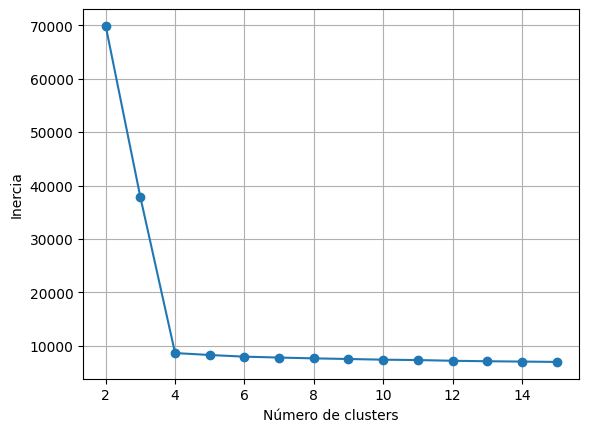

In [39]:
elbow_plot(df_scaled, "kmeans", 2, 15)

El mejor valor de _k_ se determina con el punto después del cual la inercia empieza a tener un comportamiento aproximadamente lineal, es decir, cuando el aumento del número de grupos no representa una disminución considerable de la inercia. Por lo anterior, de acuerdo a la gráfica se tiene un "codo" en k=4, valor en el cual se presenta un cambio en el comportamiento de la inercia. Sin embargo, para complementar se empleará el método de la silueta.

#### 3.1.1.2 Método de la silueta

El método de la silueta es una técnica que evalúa la calidad de los clusters generados en algoritmos de agrupamiento. En particular, el coeficiente de la silueta mide qué tan bien separado está cada punto dentro de su cluster en comparación con los clusters vecinos. Su valor oscila entre -1 y 1, donde valores cercanos a 1 indican que los puntos están bien agrupados y alejados de otros clusters, mientras que valores próximos a -1 sugieren que un punto podría estar mejor ubicado en otro cluster.

Para lo anterior se construye la funcion silhouette_plot() que grafica el coeficiente de la silueta en función del número de clusters, y se selecciona el valor de k que maximiza el coeficiente de la silueta.

In [40]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

Para los datos se tiene

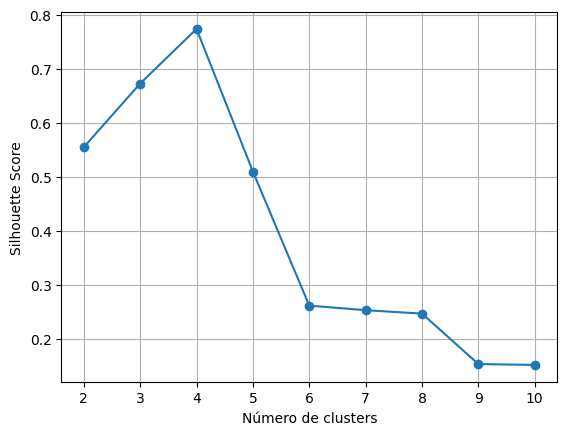

In [41]:
silhouette_plot(df_scaled, "kmeans", 2, 10)

El valor más alto del coeficiente de silueta se alcanza en k = 4, lo que indica que esta cantidad de clusters ofrece la mejor estructura de agrupación en términos de cohesión y separación. Aunque k = 3 también presenta un valor alto, el incremento en k = 4 sugiere una mejor segmentación sin aumentar demasiado la complejidad del modelo.

A partir de k = 5, el coeficiente de silueta disminuye significativamente, lo que indica que los clusters comienzan a perder cohesión interna y se solapan más. La tendencia decreciente continúa conforme el número de clusters aumenta, siendo más evidente en k ≥ 6, donde la calidad de la segmentación se ve notablemente reducida. En particular, para k = 10, el coeficiente de silueta es el más bajo, lo que indica que los clusters están menos definidos y la segmentación pierde eficacia.

Dado que k = 4 ofrece un equilibrio entre cohesión, separación e interpretabilidad, se considera la mejor opción. Para complementar este análisis, se utilizará la visualización del análisis de silueta de forma gráfica.

In [42]:
def silhouette_analysis(X, model, k_min, k_max):
    """
    Genera gráficas con el coeficiente de la silueta para cada cluster y cada ejemplo
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    for n_clusters in range(k_min, k_max+1):
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        else:
            clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
        
        # Entrenamos el modelo
        cluster_labels = clusterer.fit_predict(X)
        # Obtenemos el coeficiente promedio
        silhouette_avg = silhouette_score(X, cluster_labels)
        # Obtenemos el coeficiente para cada ejemplo
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Inicializamos una figura
        fig = plt.figure(figsize = (18, 7))
        plt.xlim([-0.2, 1])
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            # Obtenemos los valores del coeficiente para cada cluster
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            # Ordenamos los valores de mayor a menor
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Método de la silueta (k={n_clusters})")
        plt.xlabel("Coeficiente")
        plt.ylabel("Cluster")
        
        # Incluimos el valor promedio
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])
        plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

Se realiza el analisis específico para el mismo rango de k:

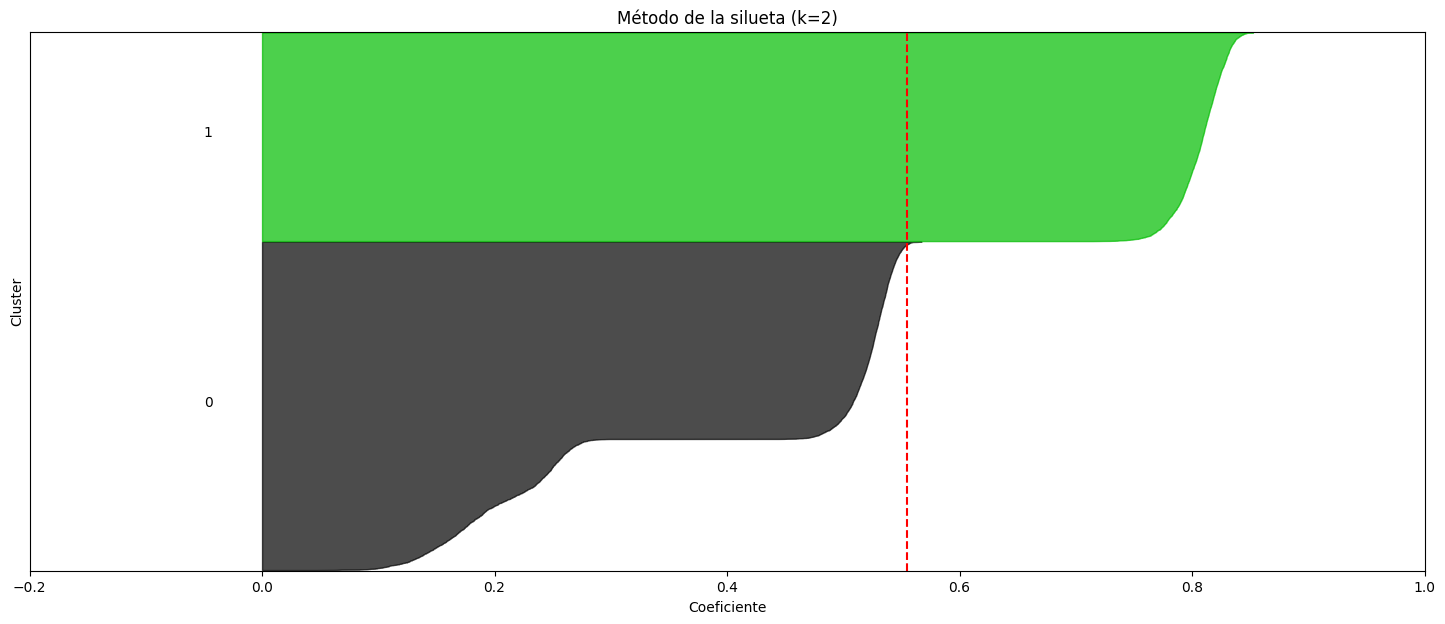

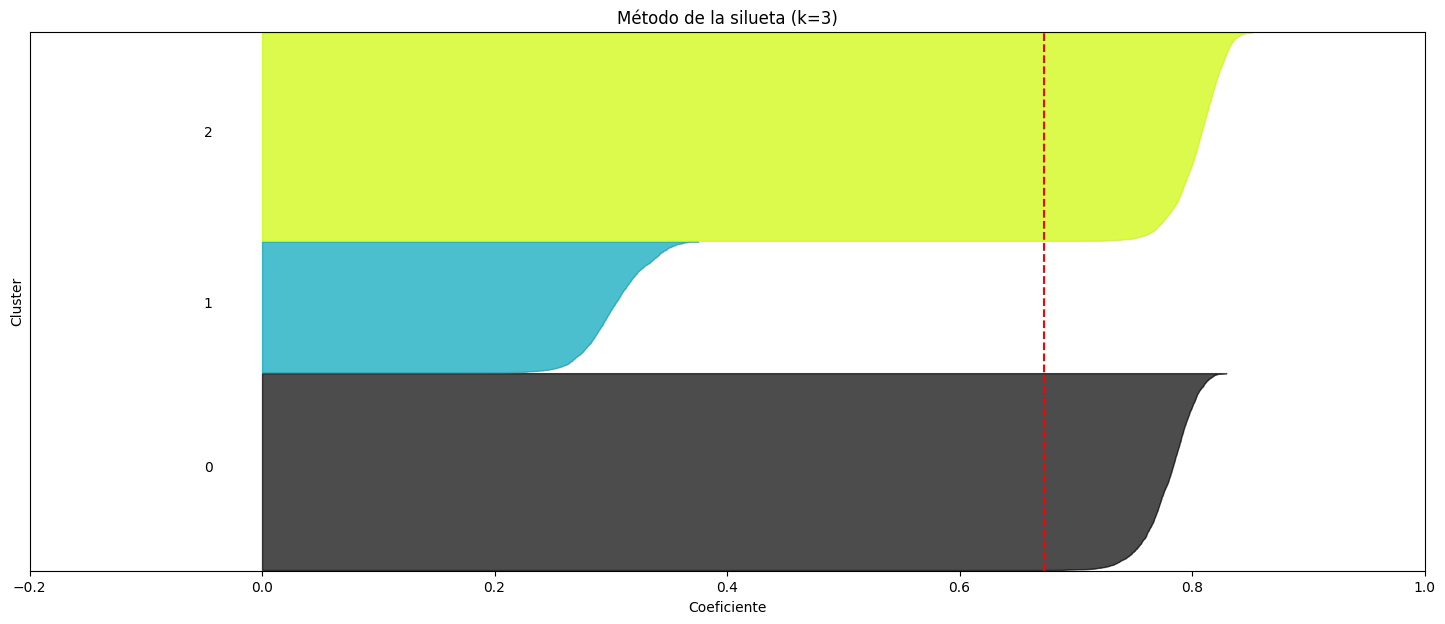

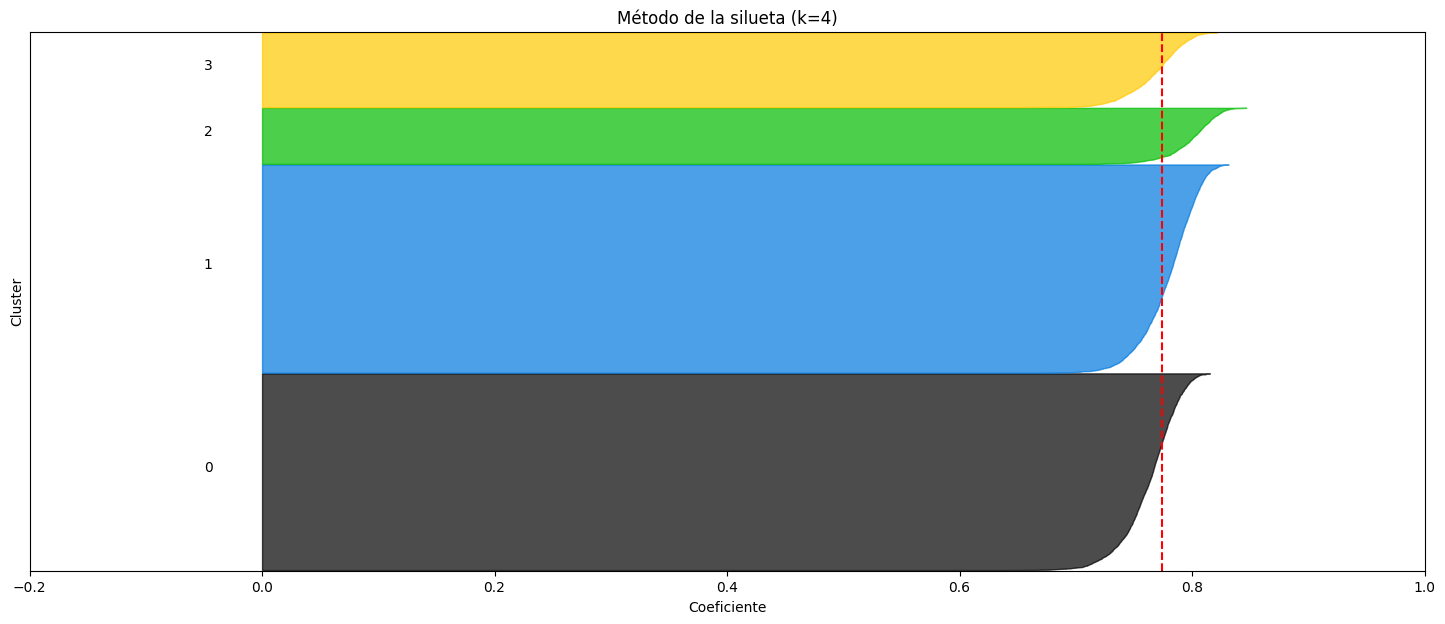

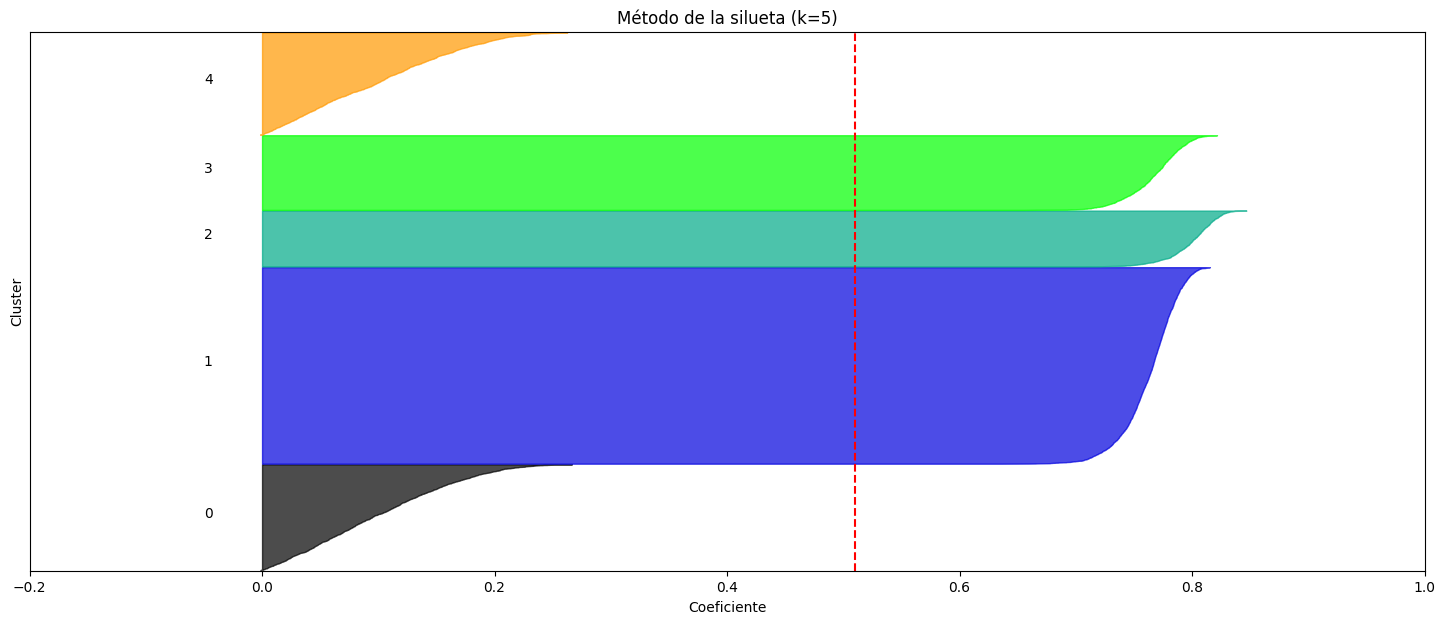

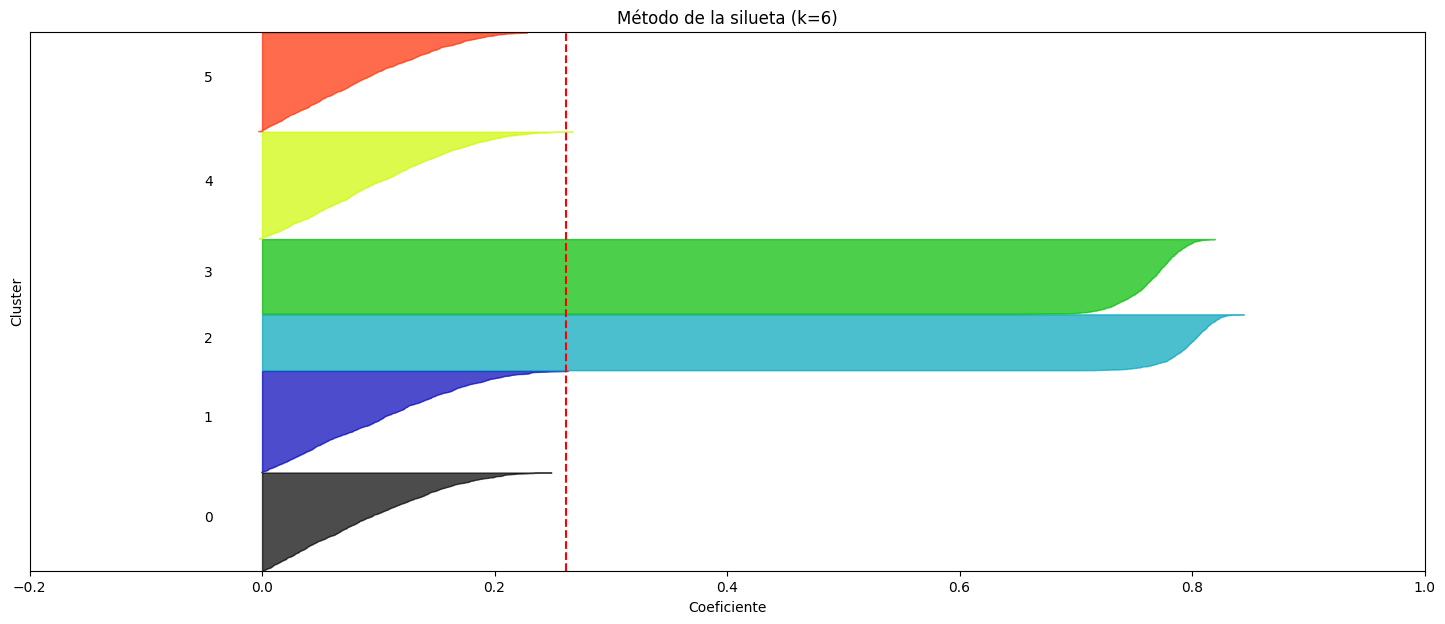

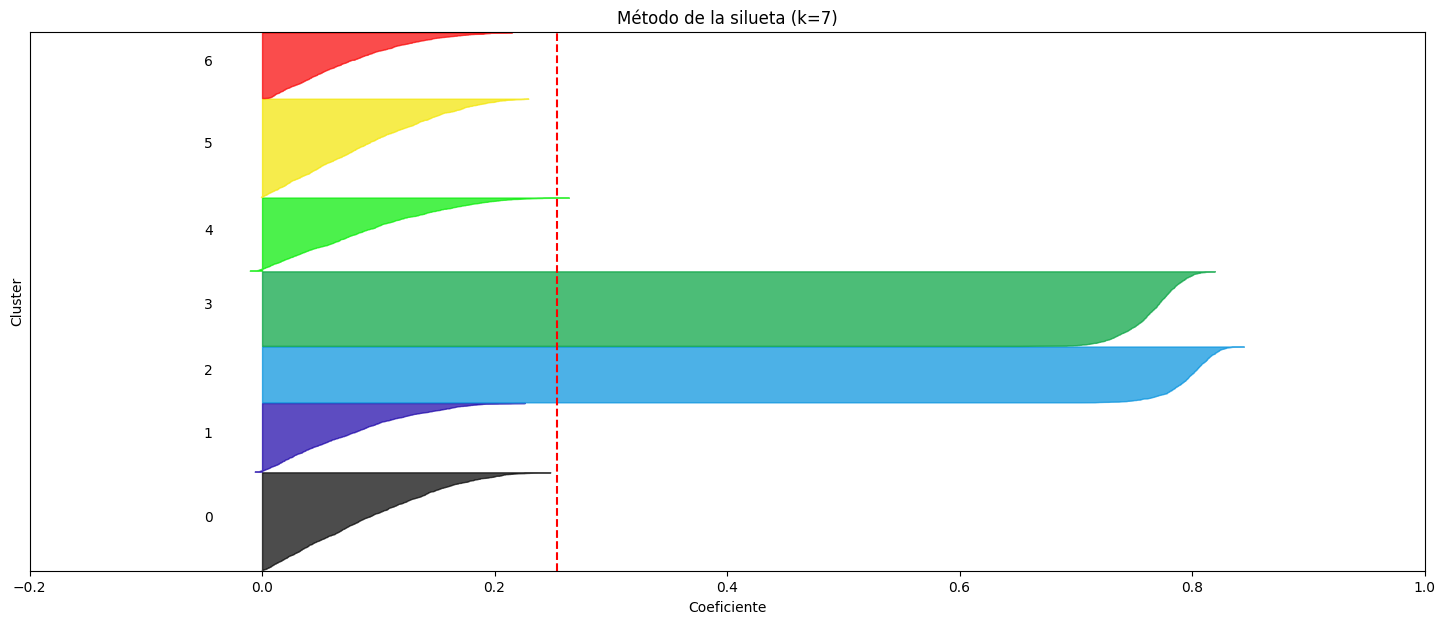

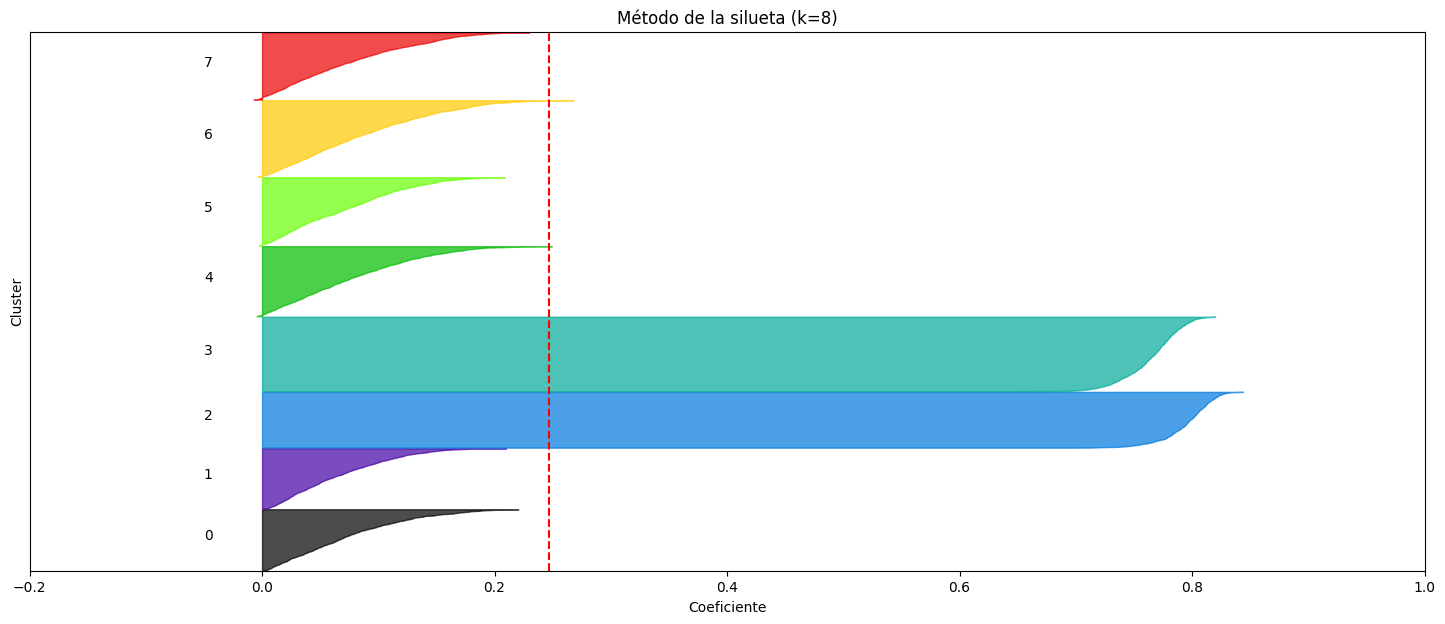

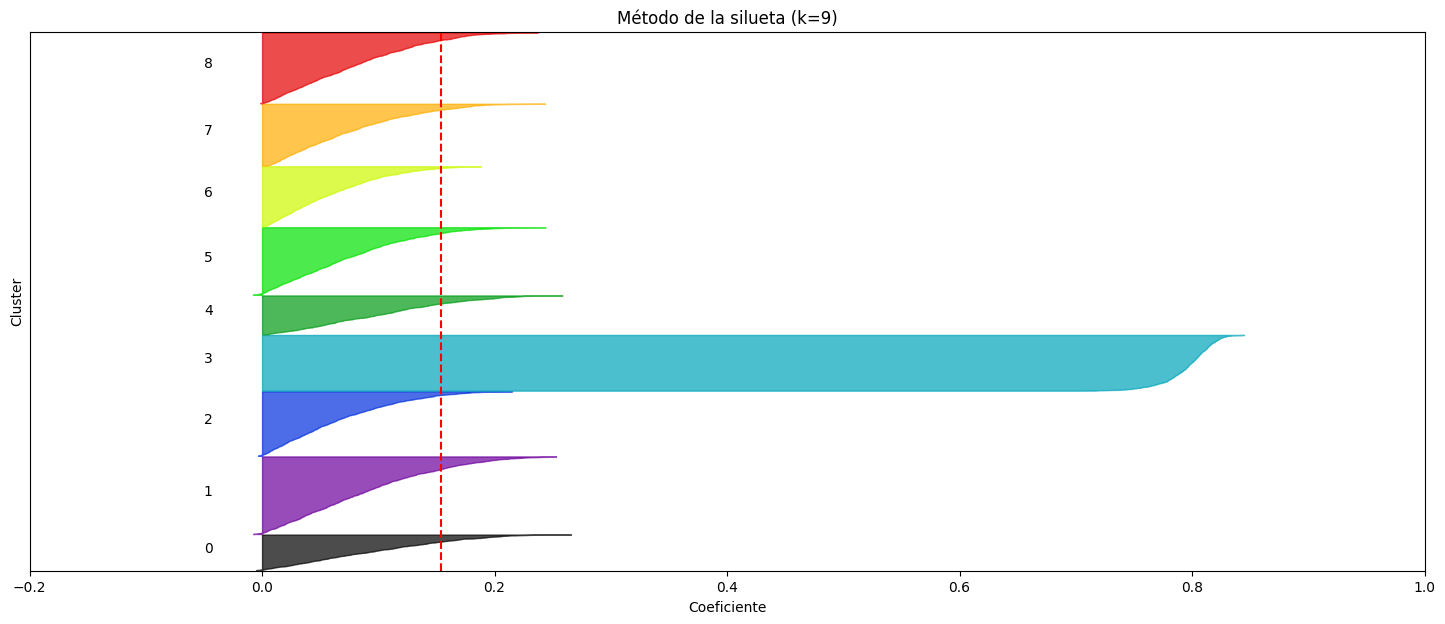

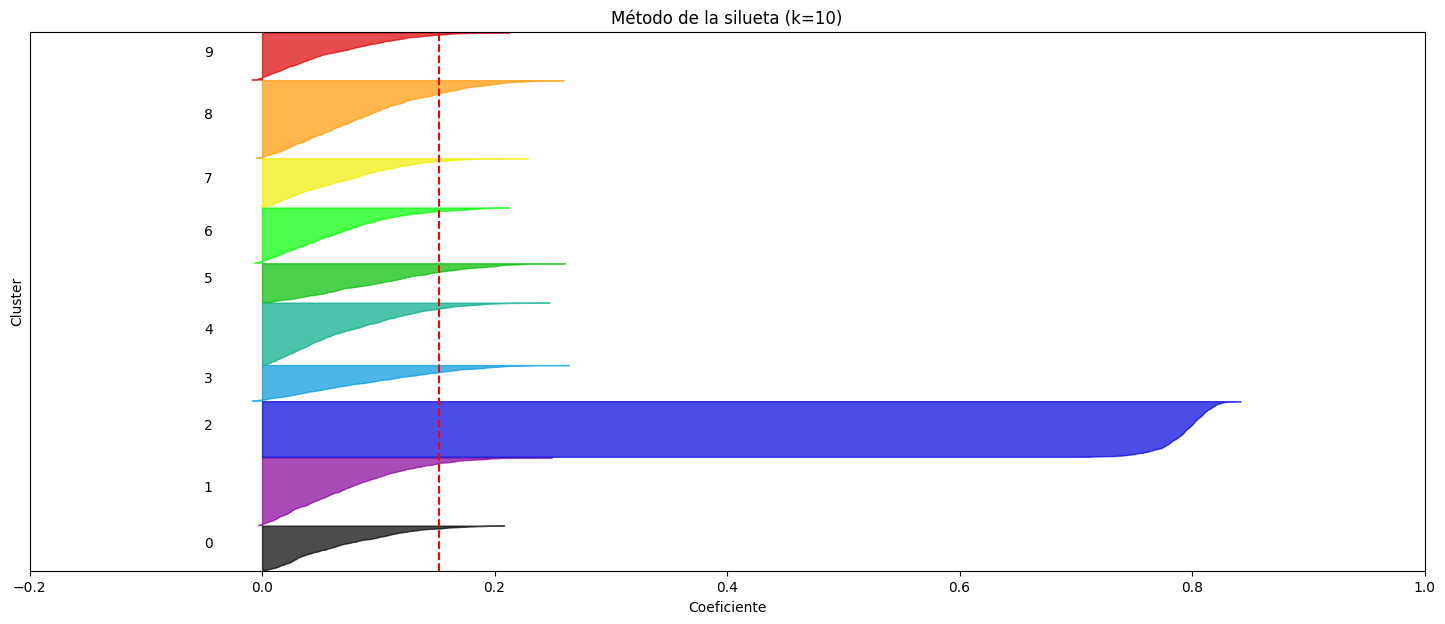

In [43]:
silhouette_analysis(df_scaled, "kmeans", 2, 10)

Para determinar el valor óptimo de k, analizamos tanto el coeficiente de silueta promedio como la distribución de los valores individuales dentro de cada cluster.

La gráfica del análisis de silueta para k = 4 muestra que esta configuración es la más adecuada, ya que presenta el mayor coeficiente de silueta y una segmentación bien definida. Donde todos los coeficientes de silueta son positivos y superiores a 0.7, lo que indica una buena cohesión dentro de los clusters y una clara separación entre ellos. Además, la línea roja, que representa el coeficiente de silueta promedio, se encuentra en un nivel alto, lo que refuerza la calidad de la agrupación. No se observan valores negativos significativos, lo que indica que los puntos están bien asignados a sus respectivos clusters, sin una superposición excesiva.

Por lo tanto, k = 4 es la mejor elección, ya que proporciona el mayor coeficiente de silueta y la segmentación más clara y efectiva.

#### 3.1.1.3 Conclusión selección de hiperparámetros

Tras analizar los diferentes métodos para determinar el número óptimo de clusters, se concluye que k = 4 es la mejor elección, basándose en los siguientes criterios:

* **Método del Codo:** La gráfica de inercia muestra un cambio significativo en k = 4, a partir del cual la reducción en la inercia comienza a estabilizarse. Esto indica que aumentar el número de clusters más allá de este punto no proporciona una mejora sustancial en la segmentación, sino que solo introduce una mayor complejidad.

* **Coeficiente de Silueta Global:** El coeficiente de silueta alcanza su valor máximo en k = 4, lo que indica que esta cantidad de clusters ofrece la mejor estructura de agrupación en términos de cohesión interna y separación entre grupos (es el pico o punto mas algo gráfico). A partir de k = 5, el coeficiente de silueta disminuye significativamente, lo que sugiere una menor calidad en la segmentación.

* **Análisis Gráfico de la Silueta:** La visualización del análisis de silueta confirma que en k = 4 los valores son mayoritariamente positivos y superiores a 0.7, lo que indica que los clusters tienen buena cohesión interna y están claramente separados. Además, la línea roja que representa el promedio del coeficiente de silueta se mantiene en un nivel alto. No se observan valores negativos significativos, lo que indica que los puntos están bien asignados a sus respectivos clusters sin una superposición excesiva.

Basado en la evaluación de estos tres enfoques, k = 4 es el valor óptimo, ya que logra un equilibrio entre una segmentación clara, una buena separación entre clusters y una interpretación eficiente sin añadir complejidad innecesaria.

### 3.1.2 Mejor modelo

Con el análisis realizado para los dos algoritmos, es posible concluir que KMeans presenta un mejor desempeño con un valor de k de 4. En ese sentido, ejecutaremos el algoritmo de KMeans:

In [44]:
km_model = KMeans(n_clusters=4, n_init="auto", random_state=0)
km_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

Se calcula el coeficiente de silueta para el modelo con k=4

In [45]:
clusters = km_model.predict(df_scaled)
print(f"Coeficiente de Silueta: {silhouette_score(df_scaled, km_model.labels_)}")


Coeficiente de Silueta: 0.7738559236834935


Grafica PCA

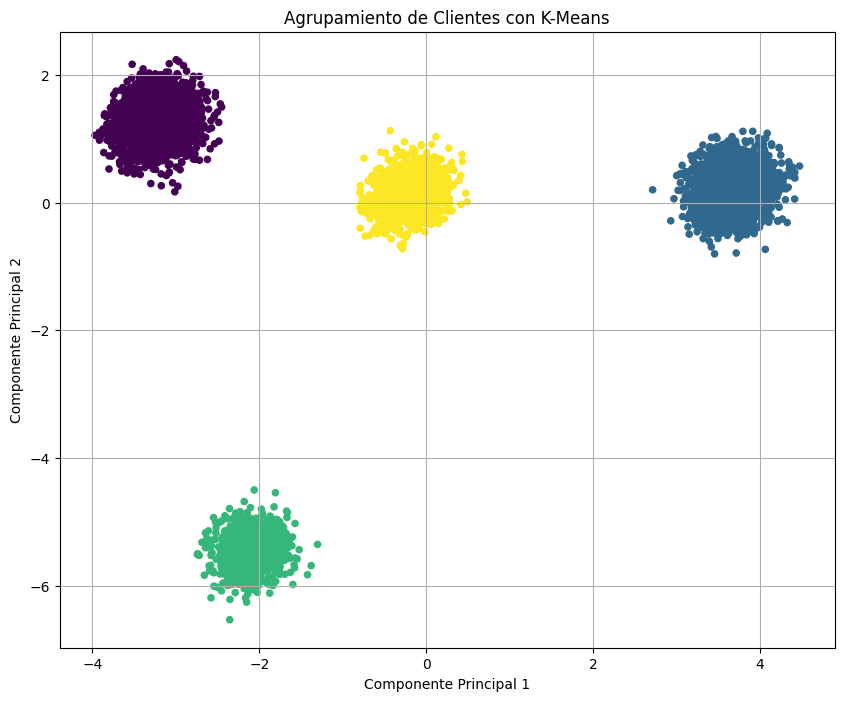

In [46]:
pca = PCA(n_components=2)
clients_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(clients_pca[:, 0], clients_pca[:, 1], c=clusters, cmap='viridis', s=20)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Clientes con K-Means')
plt.grid(True)
plt.show()

A continuacion, se mira la distribución de los clusters, para ver cuantos registros quedaron en cada uno de los clusters

In [47]:
labels = km_model.labels_
indexes, values = np.unique(labels, return_counts=True)

{indexes[i]: values[i] for i in range(len(indexes))}

{0: 3171, 1: 3356, 2: 903, 3: 1206}

([<matplotlib.axis.XTick at 0x17ea54890>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

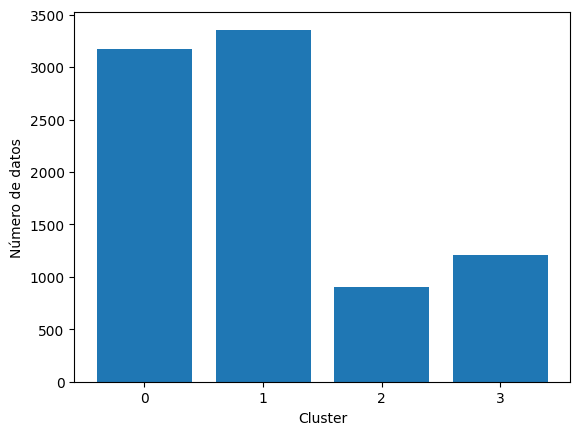

In [48]:
rects = plt.bar(indexes, values)
plt.xlabel('Cluster')
plt.ylabel('Número de datos')
plt.xticks(indexes)